# Problems with Health Care and Health Outcomes in the US

https://www.buzzfeed.com/peteraldhous/american-health-care



In [ ]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
countries = pd.read_csv('data/OECD/nations.csv')
countries.rename(columns={'isoc3': 'LOCATION'}, inplace=True)
countries = countries[countries['LOCATION'].isin(['CHE', 'TUR', 'JPN', 'CAN', 'USA'])]
countries

In [84]:
spending = pd.read_csv('data/OECD/health_spending_per_cap.csv')
spending.rename(columns={'Value': 'SPENDING'}, inplace=True)
spending = spending[['LOCATION', 'TIME', 'SPENDING']]
spending = spending[spending['LOCATION'].isin(['CHE', 'TUR', 'JPN', 'CAN', 'USA'])]

#spend_percap = spending['SPENDING'].groupby([spending['TIME'], spending['LOCATION']])
#spend_percap = spending.groupby(['TIME', 'LOCATION'])
#spend_percap = spend_percap.apply(pd.DataFrame)

In [85]:
life = pd.read_csv('data/OECD/life_expect_birth.csv')
life.rename(columns={'Value': 'LIFE'}, inplace=True)
life = life[['LOCATION', 'TIME', 'LIFE']]
life = life[life['LOCATION'].isin(['CHE', 'TUR', 'JPN', 'CAN', 'USA'])]

#life_exp = life['LIFE'].groupby([life['LOCATION'], life['TIME']])
#life_exp = life.groupby(['LOCATION', 'TIME'])
#life_exp = life_exp.apply(pd.DataFrame)

In [123]:
spend_life = pd.merge(spending, life, on=['LOCATION', 'TIME'], how='left').fillna(limit=2, method='ffill')
spend_life.tail()

,LOCATION,TIME,SPENDING,LIFE
220,USA,2011,8171.0784,78.7
221,USA,2012,8422.9900,78.8
222,USA,2013,8617.4287,78.8
223,USA,2014,9024.2064,78.8
224,USA,2015,9451.3423,78.8


In [ ]:
#spending_lifeexp = reduce(lambda x,y: pd.merge(x,y, on='TIME', how='outer'), [countries, spend_percap, life_exp])
#spending_lifeexp = pd.merge(spend_percap, life_exp, on='LOCATION', how='outer')
#spending_life = pd.concat([spend_percap, life_exp], 1)
#spending_life.head()

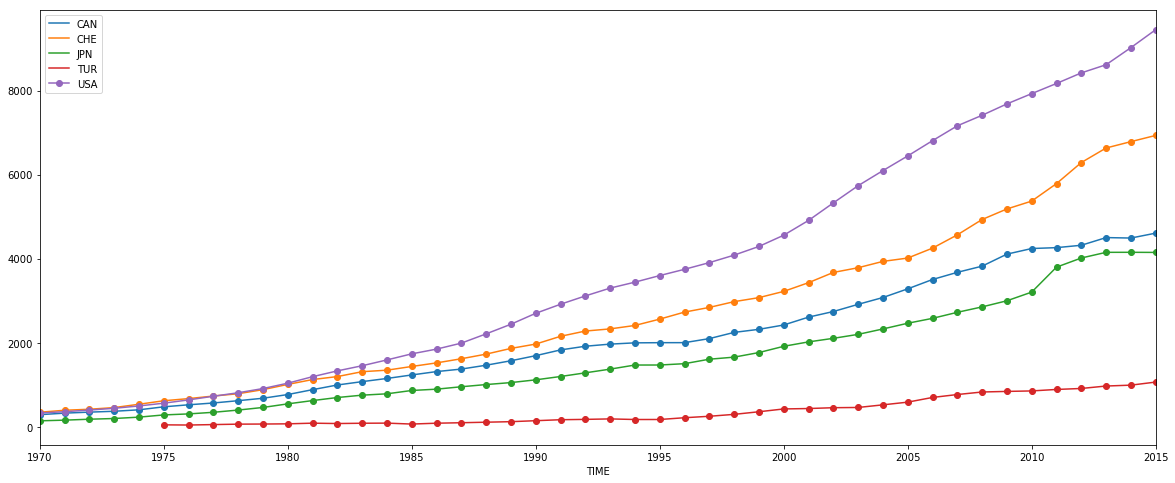

In [118]:
fig, ax = plt.subplots(figsize=(20, 8))

for key, grp in spend_life.groupby('LOCATION'):
    ax = grp.plot(ax=ax, kind='line', x='TIME', y='SPENDING', label=key, marker='o')

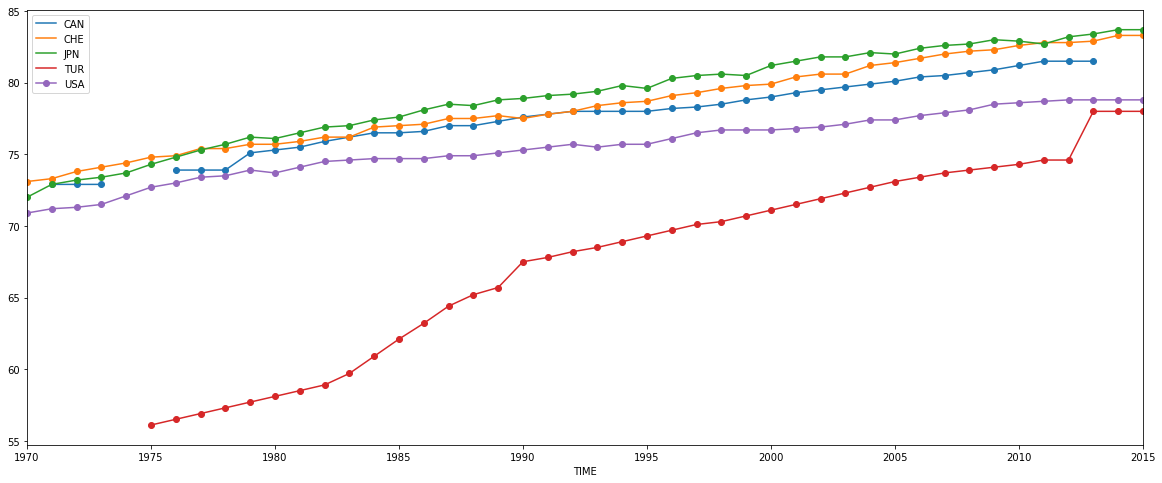

In [128]:
fig, ax = plt.subplots(figsize=(20, 8))

for key, grp in spend_life.groupby('LOCATION'):
    ax = grp.plot(ax=ax, kind='line', x='TIME', y='LIFE', label=key, marker='o')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
spend_life.groupby(['TIME', 'LOCATION']).plot(kind='line', x = "LIFE", y = "SPENDING", ax = ax)

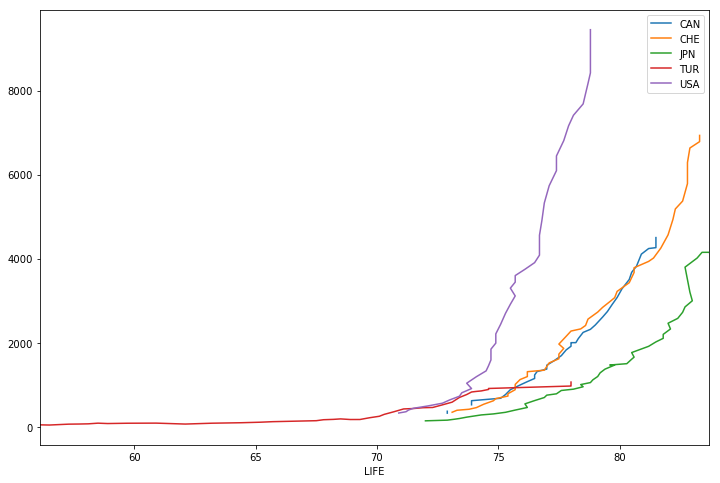

In [144]:
fig, ax = plt.subplots(figsize=(12, 8)) 
for id, group in spend_life.groupby('LOCATION'): 
    group.plot(kind='line', y='SPENDING', x='LIFE', ax=ax, label=id) 

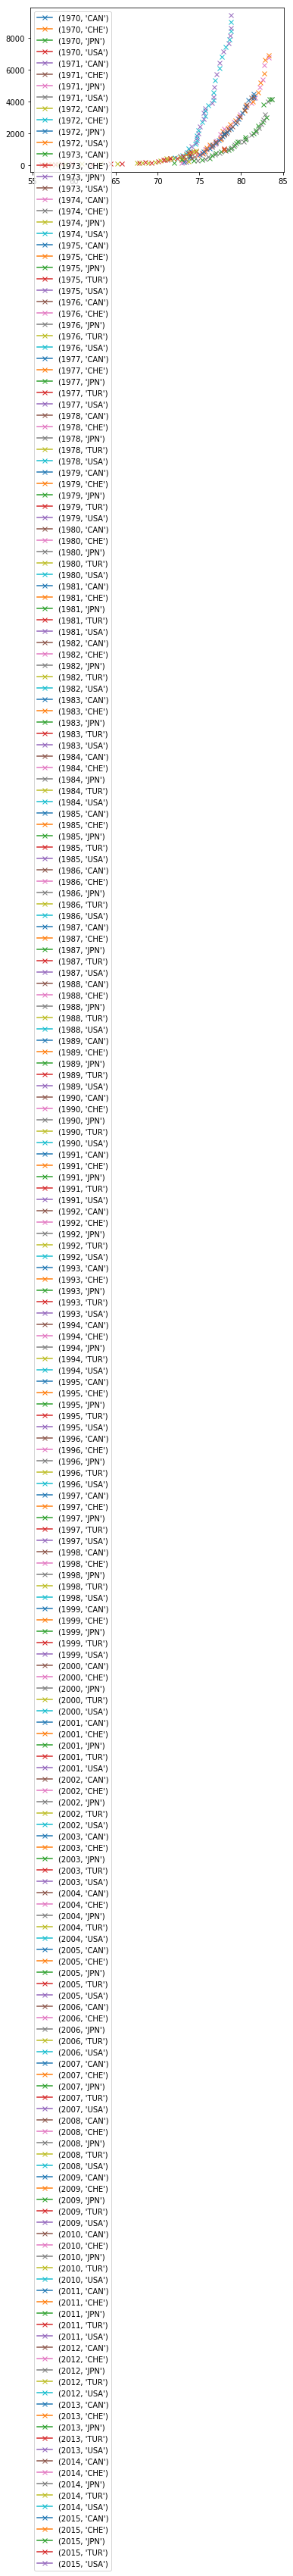

In [189]:
for name, data in spend_life.groupby(['TIME', 'LOCATION']):
    plt.plot(data.LIFE.values, data.SPENDING.values, 'x-', label = name)
plt.legend()

In [ ]:
colors = {'CAN': 'r', 'USA': 'b', 'JPN': 'orange', 'CHE': 'y', 'TUR': 'purple'}
spend_life['color'] = spend_life['LOCATION'].apply(lambda x: colors[x])

grouped = spend_life.groupby('TIME')
years = grouped.groups.keys()
fig, ax = plt.subplots(figsize=(12, 8)) 

#plt.ion()
for i in years:
    year = grouped.get_group(i)
    ax = plt.scatter(year.LIFE.values, year.SPENDING.values, marker='x', label = i, c=year.color)
    plt.pause(0.5)
#plt.ioff()
#plt.show()